In [79]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [24]:
df_train = pd.read_csv('train.csv', encoding='latin1')
df_test = pd.read_csv('test.csv', encoding='latin1')

In [25]:
df_train.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [26]:
df_test.shape

(4815, 9)

In [27]:
df_train.shape

(27481, 10)

In [28]:
df_train = df_train[["text","sentiment"]]
df_test = df_test[["text","sentiment"]]

In [29]:
df_train.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [30]:
df_train.isna().sum()

text         1
sentiment    0
dtype: int64

In [31]:
df_train.dropna(inplace=True)

In [32]:
df_test.isna().sum()

text         1281
sentiment    1281
dtype: int64

In [33]:
df_test.dropna(inplace=True)

In [34]:
count_vectorizer = CountVectorizer(stop_words="english")

In [38]:
X_train = df_train['text']
y_train = df_train['sentiment']

X_test = df_test['text']
y_test = df_test['sentiment']

In [39]:
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [42]:
model = MultinomialNB()

In [43]:
model.fit(count_train,y_train)

MultinomialNB()

In [44]:
pred = model.predict(count_test)

In [46]:
score = metrics.accuracy_score(y_test,pred)
score

0.6550650820599887

In [48]:
tfidf_vectorizer = TfidfVectorizer(stop_words="english",max_df=0.7)

In [49]:
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [53]:
model = MultinomialNB()
model.fit(tfidf_train,y_train)

MultinomialNB()

In [54]:
pred = nb_classifier.predict(tfidf_test)
score = metrics.accuracy_score(y_test,pred)
score

0.6250707413695529

In [81]:
alphas = np.arange(0,1,0.1)

def train_and_predict(alpha):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(count_train,y_train)
    pred = nb_classifier.predict(count_test)
    score = metrics.accuracy_score(y_test,pred)
    return score

alpha_val = []
score = []

for alpha in alphas:
    print('Alpha: ', alpha)
    alpha_val.append(alpha)
    print('Score: ', train_and_predict(alpha))
    score.append(train_and_predict(alpha))
    print()

Alpha:  0.0
Score:  0.5758347481607244

Alpha:  0.1
Score:  0.6222410865874364

Alpha:  0.2
Score:  0.6276174306734579


/Users/softylines/Library/Python/3.9/lib/python/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/softylines/Library/Python/3.9/lib/python/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(



Alpha:  0.30000000000000004
Score:  0.6321448783248443

Alpha:  0.4
Score:  0.6372382569326542

Alpha:  0.5
Score:  0.6417657045840407

Alpha:  0.6000000000000001
Score:  0.6460101867572157

Alpha:  0.7000000000000001
Score:  0.6471420486700622

Alpha:  0.8
Score:  0.6494057724957555

Alpha:  0.9
Score:  0.6528013582342954



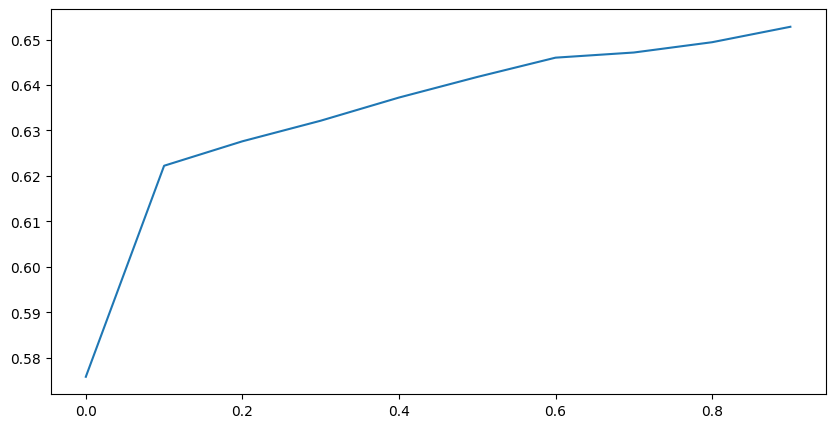

In [82]:
plt.figure(figsize=(10,5))
plt.plot(alpha_val,score)
plt.show()